<a href="https://colab.research.google.com/github/Jacqueline45/EE559_Project/blob/main/Feature_Selection_MinMax_Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/EE559_Project-main.zip

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [10]:
fires_train = pd.read_csv("/content/EE559_Project-main/datasets/algerian_fires_train.csv")
fires_test = pd.read_csv("/content/EE559_Project-main/datasets/algerian_fires_test.csv")

fires_trainx = fires_train.iloc[:,1:-1]
fires_trainy = fires_train.iloc[:,-1]
fires_testx = fires_test.iloc[:,1:-1]
fires_testy = fires_test.iloc[:,-1]

scalar = MinMaxScaler()

fires = scalar.fit_transform(fires_trainx)
firestst = scalar.fit_transform(fires_testx)

In [11]:
fires.shape

(184, 9)

In [12]:
bestfeatures = SelectKBest(score_func=chi2, k=9)

fit1 = bestfeatures.fit(fires ,fires_trainy)

dfscores = pd.DataFrame(fit1.scores_)
dfcolumns = pd.DataFrame(fires_trainx.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(9,'Score'))  #print 10 best features

         Specs      Score
7          ISI  12.013804
8          BUI   7.483032
5          DMC   7.352938
6           DC   6.711554
4         FFMC   4.688996
3         Rain   4.584517
0  Temperature   1.605675
1           RH   1.235691
2           Ws   0.010056


[0.04616517 0.04230412 0.03627512 0.06632057 0.09699987 0.13937478
 0.11707244 0.33213526 0.12335267]


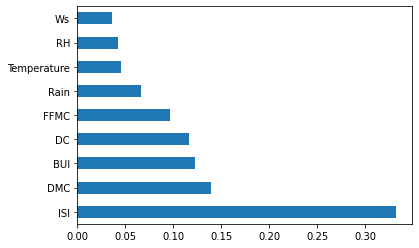

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(fires,fires_trainy)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index= fires_trainx.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()


<Figure size 1440x1440 with 0 Axes>

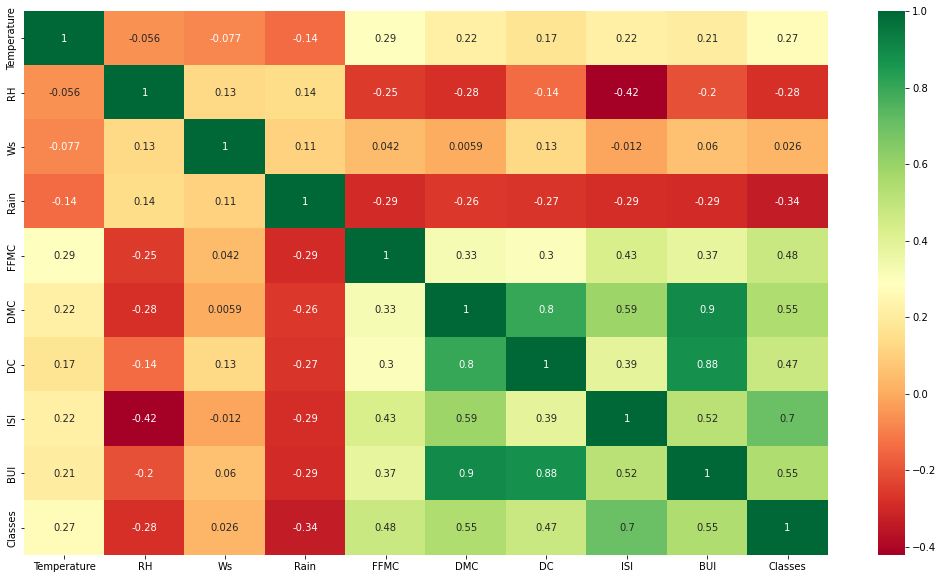

In [14]:
import seaborn as sns

corrmat = fires_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
plt.figure(figsize = (18,10))
g=sns.heatmap(fires_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")